In [1]:
#Elizabeth Pieters
#Problem 2, Problem set 1

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

DEBUG=True

In [3]:
#Step 1. read in entire text and plot
#Step 2. Write a fitting function
#Step 3. estimate error on that fitting function
#Step 4. wrap it in a routine

(144, 3)


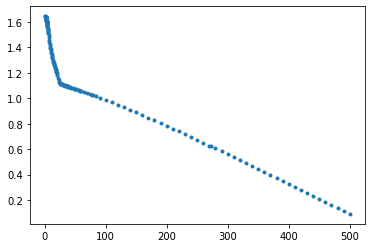

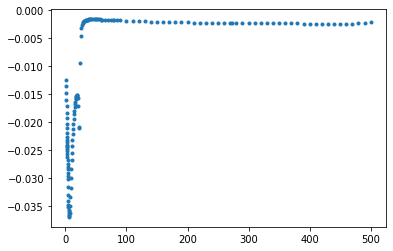

In [4]:
#Step 1. Read in txt file

data = np.genfromtxt('lakeshore.txt') #temp, voltage, dV/dT
print(data.shape)

T = data[:, 0]
V = data[:, 1]
dVdT = data[:, 2]/10**3 #put it into volts rather than mv

mpl.figure()
mpl.plot(T, V, '.')
mpl.show()

mpl.figure()
mpl.plot(T, dVdT, '.')
mpl.show()

indices of closest, second closest temp  106 107
closest, test value, second closest  140.0 144.3 150.0
delta1, delta2 4.300000000000011 -5.699999999999989
first order approximation:  0.9007729999999999


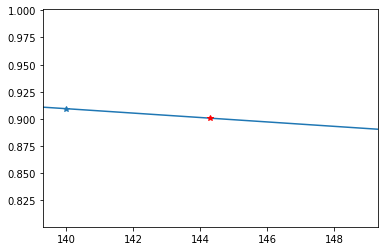

0.0008160400000000008 -0.0008080400000000008
0.007544289800000048


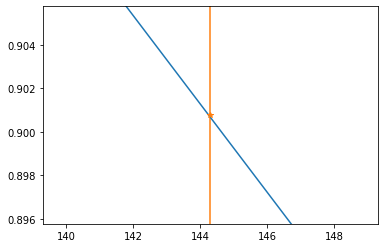

In [6]:
#Step 2. Write a fitting function.

#find delta. find closest and second closest points to it. 
    #if outside range print error this is an interpolation.
#do first taylor approximation with closest point
#approximate second derivative using both points.
#do two methods:
    # use second derivative as error
    # add in second derivative, use difference in second derivative terms as error. NAH. RIDICULOUSLY SMALL.
#plot them both with lots of points and error bars. see what looks good.

Ti = 144.3 #random test point in Kelvin

#find the closeset values
idx1 = np.argmin(np.abs(T-Ti))                  #idx of the closest temperature
delta1 = Ti - T[idx1]                           #delta to the closest temperature

idx2 = np.int(np.sign(delta1)*1 + idx1)         #idx of the second closest temperature
delta2 = Ti - T[idx2]                           #delta to the second closest temperature

if DEBUG:
    print('indices of closest, second closest temp ', idx1, idx2)
    print('closest, test value, second closest ', T[idx1], Ti, T[idx2])
    print('delta1, delta2', delta1, delta2)

#taylor approximation with first derivative
Vi = V[idx1] + dVdT[idx1]*delta1
print('first order approximation: ', Vi)

#just for plotting and debugging purposes
xlims = 5
ylims = 0.1
mpl.figure()
mpl.plot(T, V, '*-')
mpl.plot(Ti, Vi, 'r*')
mpl.xlim([Ti-xlims, Ti+xlims])
mpl.ylim([Vi-ylims, Vi+ylims])
mpl.show()

#get taylor approximation of second order derivative
#the taylor series second order derivative term is not accounted for in the interpolation, and is 
#therefore the largest source of error. here we calculate estimates of the second order derivative
#in order to determine the order of magnitude of the error.

#approximation of second order derivative AT the CLOSEST point using the SECOND CLOSEST point's data
fd2_at_idx1 = (2/(T[idx2] - T[idx1])**2) *(V[idx1] - V[idx2] - dVdT[idx2]*(T[idx2] - T[idx1]))
fd2_at_idx2 = (2/(T[idx1] - T[idx2])**2) *(V[idx2] - V[idx1] - dVdT[idx1]*(T[idx1] - T[idx2]))

print(fd2_at_idx1, fd2_at_idx2)
err_max = np.max(np.abs([fd2_at_idx1, fd2_at_idx2]))*delta1**2/2  #take the largest second order derivative
print(err_max)

xlims = 5
ylims = 0.005
mpl.figure()
mpl.plot(T, V, '*-')
mpl.errorbar(Ti, Vi, yerr=err_max, fmt='*')
mpl.xlim([Ti-xlims, Ti+xlims])
mpl.ylim([Vi-ylims, Vi+ylims])
mpl.show()
